In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import copy
import os
import glob
import pylab as pl
import numpy as np
import pandas as pd
import types
from mpl_toolkits.basemap import cm,addcyclic,Basemap, shiftgrid
import matplotlib.cm as cm
% matplotlib inline

nc_filename = sorted(glob.glob('/ocean/xiaoxiny/research/data/total/T*.csv'))
nc_filename_= sorted(glob.glob('/ocean/xiaoxiny/research/data/findk/All_Arctic-data/WLS/Th/*.csv'))
print("found *.csv file: \n{}".format(nc_filename_))



filename=sorted(glob.glob('/ocean/xiaoxiny/research/result_jasper/tracer6/newsms/fse3t_based_mask/*T200201-200712*.nc'))
ptrc=nc.Dataset(filename[0])
nav_lon=ptrc.variables['nav_lon'][:]
nav_lat=ptrc.variables['nav_lat'][:]
dep = ptrc.variables['deptht'][:]

bathy=nc.Dataset(
    '/ocean/xiaoxiny/research/data/Jasper/ANHA4_bathy_etopo1_gebco1_smoothed_coast_corrected_mar10.nc')
bathy=bathy.variables['Bathymetry'][400:,:]

found *.csv file: 
['/ocean/xiaoxiny/research/data/findk/All_Arctic-data/WLS/Th/1_ref5.csv', '/ocean/xiaoxiny/research/data/findk/All_Arctic-data/WLS/Th/23_1.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/findk/All_Arctic-data/WLS/Th/23_2.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/findk/All_Arctic-data/WLS/Th/23_3.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/findk/All_Arctic-data/WLS/Th/23_4.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/findk/All_Arctic-data/WLS/Th/60c.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/findk/All_Arctic-data/WLS/Th/60c2.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/findk/All_Arctic-data/WLS/Th/60c3.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/fi

In [2]:
import statsmodels.api as sm

In [3]:
#method 1: fit the total.. see what we get

Yellow      : 0.0401827442891 95.7064180342
Green: 0.101031206953 245.792959443


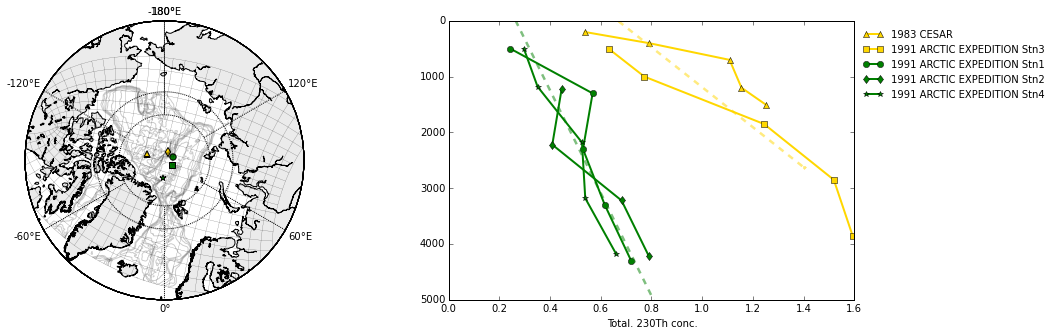

In [4]:
ax = plt.figure(1,figsize=(16,5))
ax = plt.subplot(1,2,1)
m = Basemap(projection='npstere',boundinglat=60,lon_0=0,resolution='l',round='True')
col=['gold','purple','purple','purple','purple','g','g','gold','g','purple','purple',\
     'yellowgreen','yellowgreen','yellowgreen']
mark=['^','s','o','d','*','H','D','>']

i=0
# 1983,1991

for j in ([0,5,6,7,8]):
    data=pd.read_csv(nc_filename_[j])
    lon = data['long.'];
    lat = data['lat.'];

    name= data['name'][0];  
    y_lon, yy_lat = m(lon[0], lat[0])
    m.scatter(y_lon,yy_lat,c=col[j],marker=mark[i],s=40,label=name)
    i+=1
        

#draw basemap
m.drawcoastlines()
m.fillcontinents(color = '0.85',alpha=0.5)
m.drawparallels(np.arange(-90.,90.,15.),labels=[0, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,60.),labels=[1, 1, 1, 1])
x_lon, y_lat = m(nav_lon[:], nav_lat[:])
m.plot(x_lon[::20,::20],y_lat[::20,::20],x_lon[::20,::20].T,y_lat[::20,::20].T,color='black',linewidth=0.2,alpha=0.7)
m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.2)


ax = plt.subplot(1,2,2)

i=0
##============================
#combine yellow stations
err_=[]
x_=[]
y_=[]

for j in ([0,7]):
    data=pd.read_csv(nc_filename_[j])
    if j==0:
        start=2
    else:
        start=1
    y= data['depth'][start:].values;
    x=data['230Th part.'][start:]+data['230Th diss.'][start:];

    x=np.ma.masked_where(y<=0,x)
    y=np.ma.masked_where(y<=0,y) 
    x=x.compressed()
    y=y.compressed()
    name= data['name'][0];    
    plt.plot(x,y,'-o',lw=2,color=col[j],marker=mark[i],label=name)
    i+=1
    
    
    for num in range (len(x)):
        x_.append(x[num])
        y_.append(y[num])
        
y2 = sm.add_constant(y_,prepend=False)
err_=np.array(err_)
x_=np.array(x_)
y_=np.array(y_)
mywls = sm.WLS(x_, y2).fit()
#mywls = sm.WLS(x_, y2, weights=1./err_**2).fit()#conc. depth
if j !=0:
    plt.plot([0, 1.4],[0, 1.4]/mywls.params[0]-mywls.params[1]/mywls.params[0], \
         '--.',c=col[j],linewidth=2.5,alpha=0.5)

a=mywls.params[0] #slope
b=mywls.params[1] #cons.  
Q= 0.0267
kd=0.5

k_=Q/a
s_=(kd/k_+1)*Q/b
print 'Yellow      :',s_ , k_


##============================
#combine green stations
err_=[]
x_=[]
y_=[]

for j in ([5,6,8]):
    data=pd.read_csv(nc_filename_[j])
    if j==8:
        start=1
    else:
        start=0
    y= data['depth'][start:].values;
    x=data['230Th part.'][start:]+data['230Th diss.'][start:];

    x=np.ma.masked_where(y<=0,x)
    y=np.ma.masked_where(y<=0,y) 
    x=x.compressed()
    y=y.compressed()
    if j<12:
        name= data['name'][0];    
    plt.plot(x,y,'-o',lw=2,color=col[j],marker=mark[i],label=name)
    i+=1
    
    
    for num in range (len(x)):
        #err_.append(err[num])
        x_.append(x[num])
        y_.append(y[num])
        
y2 = sm.add_constant(y_,prepend=False)
err_=np.array(err_)
x_=np.array(x_)
y_=np.array(y_)
mywls = sm.WLS(x_, y2).fit()
#mywls = sm.WLS(x_, y2, weights=1./err_**2).fit()#conc. depth
if j !=0:
    plt.plot([0, 1.4],[0, 1.4]/mywls.params[0]-mywls.params[1]/mywls.params[0], \
         '--.',c=col[j],linewidth=2.5,alpha=0.5)

a=mywls.params[0] #slope
b=mywls.params[1] #cons.  
Q= 0.0267
k__=Q/a
s__=(kd/k__+1)*Q/b
print 'Green:',s__, k__

plt.ylim(0,5000);plt.gca().invert_yaxis()
#label
plt.legend(loc='upper left', prop={'size':10}, bbox_to_anchor=(1,1),frameon=False)
plt.xlabel('Total. 230Th conc.');plt.show()

In [5]:
# sinking rate doesn't look good. Try method2...

#method2: calculate k using slopes

Yellow     : 636.300769934 212.100256645
Green      : 994.100601806 331.366867269


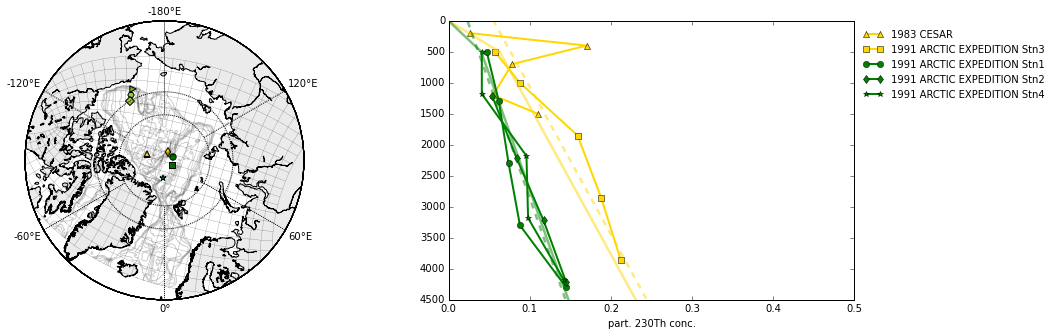

In [21]:
ax = plt.figure(1,figsize=(16,5))

# draw map
ax = plt.subplot(1,2,1)
m = Basemap(projection='npstere',boundinglat=60,lon_0=0,resolution='l',round='True')

i=0
for j in ([0,5,6,7,8,11,12,13]):
    data=pd.read_csv(nc_filename_[j])
    lon = data['long.'];
    lat = data['lat.'];
    if j<12:
        name= data['name'][0];  
    y_lon, yy_lat = m(lon[0], lat[0])
    m.scatter(y_lon,yy_lat,c=col[j],marker=mark[i],s=40,label=name)
    i+=1

#draw basemap
m.drawcoastlines()
m.fillcontinents(color = '0.85',alpha=0.5)
m.drawparallels(np.arange(-90.,90.,15.),labels=[0, 0, 0, 0])
m.drawmeridians(np.arange(-180.,180.,60.),labels=[1, 1, 1, 1])
x_lon, y_lat = m(nav_lon[:], nav_lat[:])
m.plot(x_lon[::20,::20],y_lat[::20,::20],x_lon[::20,::20].T,y_lat[::20,::20].T,color='black',linewidth=0.2,alpha=0.7)
m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.2)



#read data and fit
ax = plt.subplot(1,2,2)
i=0

#comnine yellow stations
err_=[];x_=[];y_=[]

for j in ([0,7]):
    if j ==0:
        data=pd.read_csv(nc_filename_[j])
        y= data['depth'].values[2:];# 2:not to read the data above 500m
        x=data['230Th part.'][2:]
        err =data['Th_part_err'][2:]
    else:
        data=pd.read_csv(nc_filename_[j])
        y= data['depth'].values[1:];# 1: same . read data below 500m
        x=data['230Th part.'][1:]
        err =data['Th_part_err'][1:]
    
    err=np.ma.masked_where(x<=0,err)
    x=np.ma.masked_where(y<=0,x)
    y=np.ma.masked_where(y<=0,y) 
    x=x.compressed()
    y=y.compressed()
    err=err.compressed()
    name= data['name'][0];    
    plt.plot(x,y,'-o',lw=2,color=col[j],marker=mark[i],label=name)
    i+=1
    
    
    for num in range (len(x)):
        err_.append(err[num])
        x_.append(x[num])
        y_.append(y[num])
        
y2 = sm.add_constant(y_,prepend=False)
err_=np.array(err_);x_=np.array(x_);y_=np.array(y_)

#fit and plot
mywls = sm.WLS(x_, y2).fit()
plt.plot([0, 1.4],[0, 1.4]/mywls.params[0]-mywls.params[1]/mywls.params[0], \
         '--.',c=col[j],linewidth=2.5,alpha=0.5)

s=0.0267/mywls.params[0]
print 'Yellow     :',s,s/3

#print analytical solu.
conc1=(Q/s*3)*np.array([0,500])
conc2=conc1[-1]+(Q/s)*np.array([500-500,5000-500])
plt.plot(conc1,[0, 500], \
         '-',c=col[j],linewidth=2.5,alpha=0.5)
plt.plot(conc2,[500, 5000], \
         '-',c=col[j],linewidth=2.5,alpha=0.5)



##============================
# combine green stations
err_=[];x_=[];y_=[]

for j in ([5,6,8]):
    if j==8:
        data=pd.read_csv(nc_filename_[j])
        y= data['depth'].values[1:];
        x=data['230Th part.'][1:]
        err =data['Th_part_err']
    else:
        data=pd.read_csv(nc_filename_[j])
        y= data['depth'].values;
        x=data['230Th part.']
        err =data['Th_part_err']
    
    err=np.ma.masked_where(x<=0,err)
    x=np.ma.masked_where(y<=0,x)
    y=np.ma.masked_where(y<=0,y) 
    x=x.compressed()
    y=y.compressed()
    err=err.compressed()
    name= data['name'][0];    
    plt.plot(x,y,'-o',lw=2,color=col[j],marker=mark[i],label=name)
    i+=1
    
    
    for num in range (len(x)):
        err_.append(err[num])
        x_.append(x[num])
        y_.append(y[num])
        
y2 = sm.add_constant(y_,prepend=False)
err_=np.array(err_);x_=np.array(x_);y_=np.array(y_)


#fit and plot
mywls = sm.WLS(x_, y2).fit()
plt.plot([0, 1.4],[0, 1.4]/mywls.params[0]-mywls.params[1]/mywls.params[0], \
         '--.',c=col[j],linewidth=2.5,alpha=0.5)

s_=0.0267/mywls.params[0]
print 'Green      :',s_,s_/3
     

#print analytical solu.
conc1=(Q/s_*3)*np.array([0,500])
conc2=conc1[-1]+(Q/s_)*np.array([500-500,5000-500])
plt.plot(conc1,[0, 500], \
         '-',c=col[j],linewidth=2.5,alpha=0.5)
plt.plot(conc2,[500, 5000], \
         '-',c=col[j],linewidth=2.5,alpha=0.5)



plt.xlim(0,0.5);plt.ylim(0,4500);plt.gca().invert_yaxis();
#label
plt.legend(loc='upper left', prop={'size':10}, bbox_to_anchor=(1,1),frameon=False)
plt.xlabel('part. 230Th conc.');plt.show()

Yellow:      k 0.141631399141 k_1 0.8 Q/k 0.188517519151
Green:     k 0.26277209589 k_1 0.8 Q/k 0.101608962358


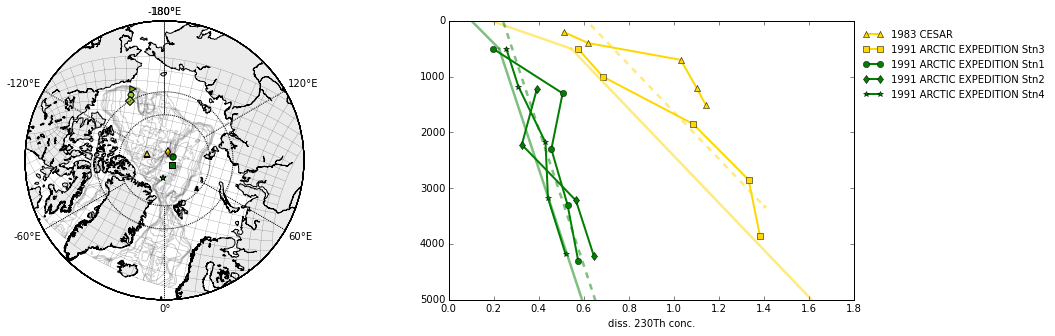

In [22]:
ax = plt.figure(1,figsize=(16,5))
ax = plt.subplot(1,2,1)
m = Basemap(projection='npstere',boundinglat=60,lon_0=0,resolution='l',round='True')
col=['gold','purple','purple','purple','purple','g','g','gold','g','purple','purple',\
     'yellowgreen','yellowgreen','yellowgreen']
mark=['^','s','o','d','*','H','D','>']

i=0
# 1983,1991
for j in ([0,5,6,7,8,11,12,13]):
    data=pd.read_csv(nc_filename_[j])
    lon = data['long.'];
    lat = data['lat.'];
    if j<12:
        name= data['name'][0];  
    y_lon, yy_lat = m(lon[0], lat[0])
    m.scatter(y_lon,yy_lat,c=col[j],marker=mark[i],s=40,label=name)
    i+=1
        

#draw basemap
m.drawcoastlines()
m.fillcontinents(color = '0.85',alpha=0.5)
m.drawparallels(np.arange(-90.,90.,15.),labels=[0, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,60.),labels=[1, 1, 1, 1])
x_lon, y_lat = m(nav_lon[:], nav_lat[:])
m.plot(x_lon[::20,::20],y_lat[::20,::20],x_lon[::20,::20].T,y_lat[::20,::20].T,color='black',linewidth=0.2,alpha=0.7)
m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.2)


ax = plt.subplot(1,2,2)
#1983,1991
i=0

#===============================================

#combine yellow station profiles

err_=[];x_=[];y_=[]


for j in ([0,7]):
    if j ==0:
        data=pd.read_csv(nc_filename_[j])
        y= data['depth'].values[2:];
        x=data['230Th diss.'][2:]
        err =data['Th_diss_err'][2:]
    else:
        data=pd.read_csv(nc_filename_[j])
        y= data['depth'].values[1:];
        x=data['230Th diss.'][1:]#+data['230Th diss.'];
        err =data['Th_diss_err'][1:]
    
    err=np.ma.masked_where(x<=0,err)
    x=np.ma.masked_where(y<=0,x)
    y=np.ma.masked_where(y<=0,y) 
    x=x.compressed()
    y=y.compressed()
    err=err.compressed()
    name= data['name'][0];    
    plt.plot(x,y,'-o',lw=2,color=col[j],marker=mark[i],label=name)
    i+=1
    
    
    for num in range (len(x)):
        err_.append(err[num])
        x_.append(x[num])
        y_.append(y[num])
        
        
y2 = sm.add_constant(y_,prepend=False)
err_=np.array(err_);x_=np.array(x_);y_=np.array(y_)

mywls = sm.WLS(x_, y2).fit()
plt.plot([0, 1.4],[0, 1.4]/mywls.params[0]-mywls.params[1]/mywls.params[0], \
         '--.',c=col[j],linewidth=2.5,alpha=0.5)


a=mywls.params[0] #slope
b=mywls.params[1] #cons.  
Q= 0.0267
Jvalue_=0.8
Kvalue=Q/s*Jvalue_/a

#print analytical solu.
conc1=Q/Kvalue+Jvalue_/Kvalue*(Q/s*3)*np.array([0,500])
conc2=conc1[-1]+Jvalue_/Kvalue*(Q/s)*np.array([500-500,5000-500])
plt.plot(conc1,[0, 500], \
         '-',c=col[j],linewidth=2.5,alpha=0.5)
plt.plot(conc2,[500, 5000], \
         '-',c=col[j],linewidth=2.5,alpha=0.5)





print 'Yellow:      k',Kvalue,'k_1',Jvalue_,'Q/k',Q/Kvalue
    
#====================================

#combine green stations

err_=[];x_=[];y_=[]

for j in ([5,6,8]):
    if j==8:
        data=pd.read_csv(nc_filename_[j])
        y= data['depth'].values[1:];
        x=data['230Th diss.'][1:]
        err =data['Th_diss_err']
    else:
        data=pd.read_csv(nc_filename_[j])
        y= data['depth'].values;
        x=data['230Th diss.']#+data['230Th diss.'];
        err =data['Th_diss_err']
    
    err=np.ma.masked_where(x<=0,err)
    x=np.ma.masked_where(y<=0,x)
    y=np.ma.masked_where(y<=0,y) 
    x=x.compressed()
    y=y.compressed()
    err=err.compressed()
    name= data['name'][0];    
    plt.plot(x,y,'-o',lw=2,color=col[j],marker=mark[i],label=name)
    i+=1
    
    
    for num in range (len(x)):
        err_.append(err[num])
        x_.append(x[num])
        y_.append(y[num])
        
        
y2 = sm.add_constant(y_,prepend=False)
err_=np.array(err_);x_=np.array(x_);y_=np.array(y_)

# fit and plot
mywls = sm.WLS(x_, y2).fit()

plt.plot([0, 1.4],[0, 1.4]/mywls.params[0]-mywls.params[1]/mywls.params[0], \
         '--.',c=col[j],linewidth=2.5,alpha=0.5)

a=mywls.params[0] #slope
b=mywls.params[1] #cons.     

Kvalue_=Q/s_*Jvalue_/a

#print analytical solu.
conc1=Q/Kvalue_+Jvalue_/Kvalue_*(Q/s_*3)*np.array([0,500])
conc2=conc1[-1]+Jvalue_/Kvalue_*(Q/s_)*np.array([500-500,5000-500])
plt.plot(conc1,[0, 500], \
         '-',c=col[j],linewidth=2.5,alpha=0.5)
plt.plot(conc2,[500, 5000], \
         '-',c=col[j],linewidth=2.5,alpha=0.5)





print 'Green:     k',Kvalue_,'k_1',Jvalue_,'Q/k',Q/Kvalue_



plt.ylim(0,5000);plt.gca().invert_yaxis()
#label
plt.legend(loc='upper left', prop={'size':10}, bbox_to_anchor=(1,1),frameon=False)
plt.xlabel('diss. 230Th conc.');plt.show()

Yellow:      k 0.141631399141 k_1 0.8 Q/k 0.188517519151
Green:     k 0.26277209589 k_1 0.8 Q/k 0.101608962358


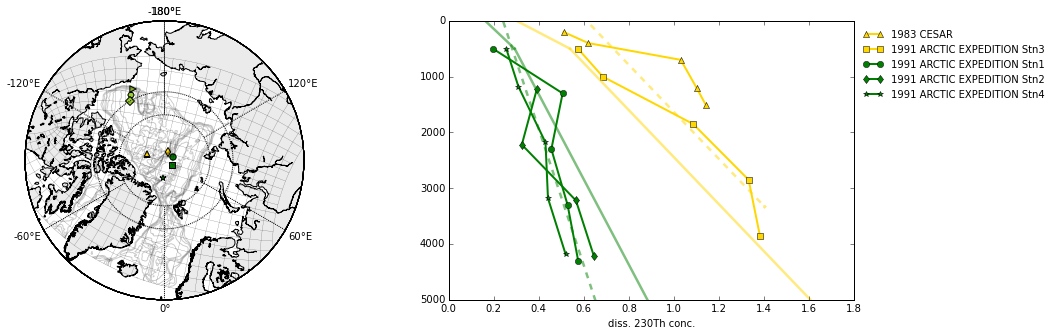

In [82]:
#0.8
#Bacon et al.[1989] estimated k in the Arctic is between 0.16-0.47. 
#They have higher desorption rate though..(2.6-9.8, the averaged esitimated is 3.0)

#Yingmin:k=0.5~1.0  k-1=1.6

Yellow:      k 0.0885196244632 k_1 0.5 Q/k 0.301628030642
Green:     k 0.164232559931 k_1 0.5 Q/k 0.162574339772


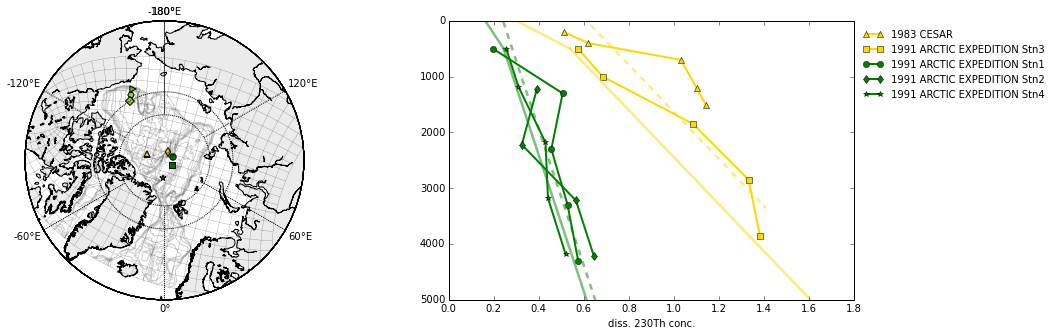

In [68]:
#0.5
#The fit looks great.

In [9]:
# fit with ice (NASA's algorithm)
#ice=[0.923636,0.35]   #NASA

#bootstrap ice
ice=[0.996364,0.477273] 
k=[Kvalue,Kvalue_]
s=[s,s_]

In [10]:
#add intercept
ice_ = sm.add_constant(ice,prepend=False)

#fit
paraS=sm.WLS(s,ice_).fit()
paraK=sm.WLS(k,ice_).fit()

[0 1] [ 1323.07605921   633.79454234]


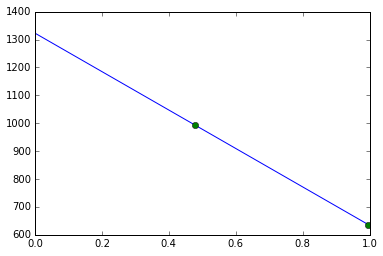

In [11]:
# s and ice
x=np.array([0,1])
yS=x*paraS.params[0]+paraS.params[1]
print x,yS
plt.plot(x,yS)
plt.plot(np.array(ice), np.array(s), 'o')

[0 1] [ 0.37415369  0.14078286]


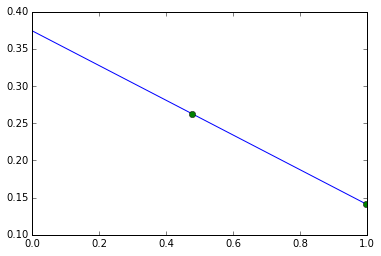

In [12]:
#k and ice
yK=x*paraK.params[0]+paraK.params[1]
print x,yK
plt.plot(x,yK)
plt.plot(np.array(ice), np.array(k), 'o')